In [1]:
#Justin Harris
#CS 477-441
#Final Project Code
        
from __future__ import print_function
import keras
import tensorflow as tf
from keras.utils import np_utils
from keras import backend as K
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import itertools
%matplotlib inline

In [2]:
#default Keras batch size
batch_size = 32

#number of classes in dataset
class_num = 10

epochs = 100
data_augmentation = False

In [3]:
#Import and pre-process the data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train Shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print(X_train.shape[0], 'training samples')
print(X_test.shape[0], 'test samples')

X_train Shape:  (50000, 32, 32, 3)
y_train.shape:  (50000, 1)
50000 training samples
10000 test samples


C:\Users\Justin\anaconda3\envs\tensorflow-gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Justin\anaconda3\envs\tensorflow-gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


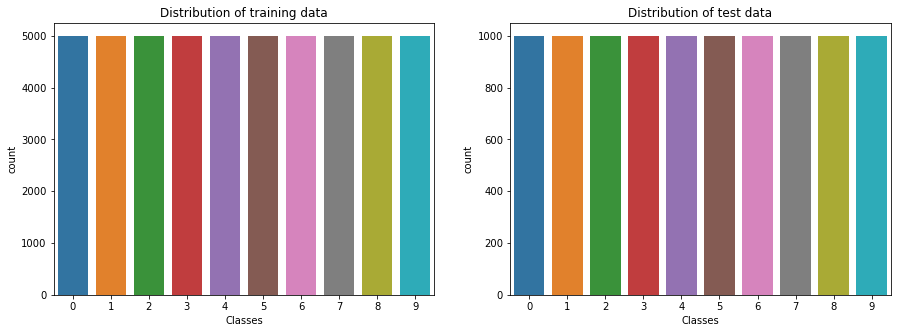

In [4]:
# Data distribution code sourced from: https://www.kaggle.com/roblexnana/cifar10-with-cnn-for-beginer
# Data distribution
fig, axis = plt.subplots(1, 2, figsize = (15,5))

#Count plot for training set
sns.countplot(y_train.ravel(), ax=axis[0])
axis[0].set_title('Distribution of training data')
axis[0].set_xlabel('Classes')

#Count plot for test set
sns.countplot(y_test.ravel(), ax=axis[1])
axis[1].set_title('Distribution of test data')
axis[1].set_xlabel('Classes')

plt.show()

In [5]:
# Convert data to float type and Normalize data

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

#Normalize data to be between 0 and 1
X_train /= 255
X_test /= 255

# Convert vectors to binary class matricies
y_train = keras.utils.np_utils.to_categorical(y_train, class_num)
y_test = keras.utils.np_utils.to_categorical(y_test, class_num)

In [6]:
# Define Deep Net using Convnet  architecture
# Model based off of https://www.kaggle.com/roblexnana/cifar10-with-cnn-for-beginer, and
# https://www.kaggle.com/datajameson/cifar-10-object-recognition-cnn-explained

def myCNN():

    CNN_model = keras.models.Sequential()

    # First Conv layer
    CNN_model.add(Conv2D(32, (3, 3), padding='same', input_shape = X_train.shape[1:]))
    CNN_model.add(Activation('relu'))

    # 2nd Conv layer
    CNN_model.add(Conv2D(32, (3, 3)))
    CNN_model.add(Activation('relu'))

    # Use Max-pooling and drop out to help reduce over-fitting and training time
    CNN_model.add(MaxPooling2D(pool_size = (2, 2)))
    CNN_model.add(Dropout(0.25))

    # 3rd Conv Layer
    CNN_model.add(Conv2D(64, (3, 3), padding='same'))
    CNN_model.add(Activation('relu'))

    #4th Conv Layer
    CNN_model.add(Conv2D(64, (3, 3)))
    CNN_model.add(Activation('relu'))

    # Use Max-pooling and drop out to help reduce over-fitting and training time
    CNN_model.add(MaxPooling2D(pool_size = (2, 2)))
    CNN_model.add(Dropout(0.25))

    #5th Conv Layer
    CNN_model.add(Flatten())
    CNN_model.add(Dense(512))
    CNN_model.add(Activation('relu'))
    CNN_model.add(Dropout(0.5))

    #softmax classifier
    CNN_model.add(Dense(class_num))
    CNN_model.add(Activation('softmax'))


    
    return CNN_model


In [7]:
cnn1 = myCNN()
cnn1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        1

In [ ]:
# Build and Adam Train model
adam_opt = tf.keras.optimizers.Adam(lr = .0001)
cnn1.compile(loss = 'categorical_crossentropy',
              optimizer = adam_opt, metrics = ['accuracy'])

             
print('Training Model:')
history1 = cnn1.fit(X_train, y_train,
                        batch_size = batch_size,
                        epochs = epochs,
                        validation_data = (X_test, y_test),
                        shuffle = True)
    

C:\Users\Justin\anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Training Model:
Epoch 1/100
1563/1563 [==============================] - 24s 6ms/step - loss: 1.7395 - accuracy: 0.3615 - val_loss: 1.4851 - val_accuracy: 0.4715
Epoch 2/100
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4351 - accuracy: 0.4834 - val_loss: 1.2931 - val_accuracy: 0.5417
Epoch 3/100
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3056 - accuracy: 0.5331 - val_loss: 1.1856 - val_accuracy: 0.5839
Epoch 4/100
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2104 - accuracy: 0.5699 - val_loss: 1.1051 - val_accuracy: 0.6090
Epoch 5/100
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1333 - accuracy: 0.6006 - val_loss: 1.0389 - val_accuracy: 0.6391
Epoch 6/100
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0646 - accuracy: 0.6250 - val_loss: 0.9810 - val_accuracy: 0.6646
Epoch 7/100
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0089 - accuracy: 0.6463 - val_loss

In [ ]:
cnn1.save("ADAM.h5")

#Plot for model accuracy and loss for evaluation
def modelplot(history):
    fig, axis = plt.subplots(1, 2, figsize = (15, 5))
    
    #summarize accuracy
    axis[0].plot(history.history['accuracy'])
    axis[0].plot(history.history['val_accuracy'])
    axis[0].set_title('Model Accuracy')
    axis[0].set_ylabel('Accuracy')
    axis[0].set_xlabel('Epoch')
    axis[0].legend(['train', 'validate'], loc = 'upper left')
    
    #summarize loss
    axis[1].plot(history.history['loss'])
    axis[1].plot(history.history['val_loss'])
    axis[1].set_title('Model Loss')
    axis[1].set_ylabel('Loss')
    axis[1].set_xlabel('Epoch')
    axis[1].legend(['train', 'validate'], loc = 'upper left')
    fig.savefig('Accuracy_Loss.png')
    
#list data in model history
print(history1.history.keys())
    
#plot model and loss
modelplot(history1)

In [ ]:
# Score model
CNN_score1 = cnn1.evaluate(X_test, y_test, verbose = 1)
print('Test Loss: ', CNN_score1[0])
print('Test Acc: ', CNN_score1[1])

#prediction
pred = cnn1.predict(X_test)

In [ ]:
#reset Keras object after training model
K.clear_session()

cnn2 = myCNN()

#set rms_optimizer
rms_opt = keras.optimizers.RMSprop(lr = 0.0001)

#Build and train RMSprop model
cnn2.compile(loss = 'categorical_crossentropy',
                optimizer = rms_opt,
                metrics = ['accuracy'])
                  
print('Training Model:')
history2 = cnn2.fit(X_train, y_train,
                        batch_size = batch_size,
                        epochs = epochs,
                        validation_data = (X_test, y_test),
                        shuffle = True)

In [ ]:
cnn2.save("RMSprop.h5")
    
#list data in model history
print(history2.history.keys())
    
#plot model and loss
modelplot(history2)

In [ ]:
# Score model
CNN_score2 = cnn2.evaluate(X_test, y_test, verbose = 1)
print('Test Loss: ', CNN_score2[0])
print('Test Acc: ', CNN_score2[1])

#prediction
pred = cnn2.predict(X_test)